# NebulaNet

In [1]:
import numpy as np  ##Imports the NumPy library and gives it the alias "np"
import pandas as pd ## Imports the Pandas library and gives it the alias "pd"
import os  ## Imports the os library for file system operations

In [2]:
os.chdir('C:\\Users\\Subod\\OneDrive\\Desktop\\nebulanet')

# Train Data Preprocessing

In [3]:
train = pd.read_csv('train.csv')  # load the dataset
train.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,Umber Dwarfs,Red,M
1,3042,0.000500,0.1542,16.60,Umber Dwarfs,Red,M
2,2600,0.000300,0.1020,18.70,Umber Dwarfs,Red,M
3,2800,0.000200,0.1600,16.65,Umber Dwarfs,Red,M
4,1939,0.000138,0.1030,20.06,Umber Dwarfs,Red,M


In [4]:
train = train[['Temperature (K)','Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)', 'Star color', 'Spectral Class', 'Star type']]
train.head()                      

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star color,Spectral Class,Star type
0,3068,0.002400,0.1700,16.12,Red,M,Umber Dwarfs
1,3042,0.000500,0.1542,16.60,Red,M,Umber Dwarfs
2,2600,0.000300,0.1020,18.70,Red,M,Umber Dwarfs
3,2800,0.000200,0.1600,16.65,Red,M,Umber Dwarfs
4,1939,0.000138,0.1030,20.06,Red,M,Umber Dwarfs


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         216 non-null    int64  
 1   Luminosity(L/Lo)        216 non-null    float64
 2   Radius(R/Ro)            216 non-null    float64
 3   Absolute magnitude(Mv)  216 non-null    float64
 4   Star color              216 non-null    object 
 5   Spectral Class          216 non-null    object 
 6   Star type               216 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 11.9+ KB


In [6]:
train.describe()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv)
count,216.000000,216.000000,216.000000,216.000000
mean,10211.055556,101421.163769,223.778661,4.528634
std,9214.606535,172474.272121,504.416657,10.475934
min,1939.000000,0.000080,0.008400,-11.920000
25%,3344.250000,0.000878,0.102750,-6.225500
50%,5776.000000,0.039000,0.702500,10.150000
75%,14366.750000,195750.000000,39.750000,13.830000
max,40000.000000,834042.000000,1948.500000,20.060000


In [7]:
train.isna().sum()

Temperature (K)           0
Luminosity(L/Lo)          0
Radius(R/Ro)              0
Absolute magnitude(Mv)    0
Star color                0
Spectral Class            0
Star type                 0
dtype: int64

# Data Visualisation

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
## importing LabelEncoder to encode object to int
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

In [10]:
## fitting column into LabelEncoder
train['Star color'] = LE.fit_transform(train['Star color'])
train['Spectral Class'] = LE.fit_transform(train['Spectral Class'])

<Figure size 1200x600 with 0 Axes>

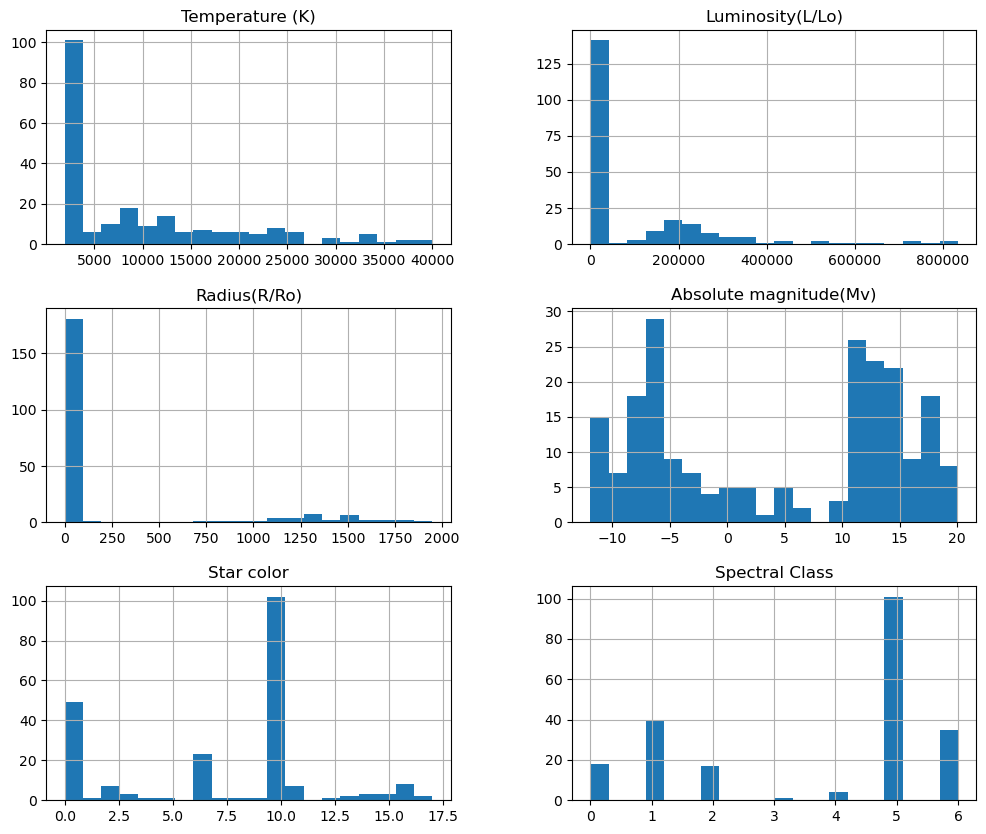

In [11]:
## Ploting histograms of each column
plt.figure(figsize=(12,6))
train.hist(bins=20, figsize=(12,10))
plt.show()

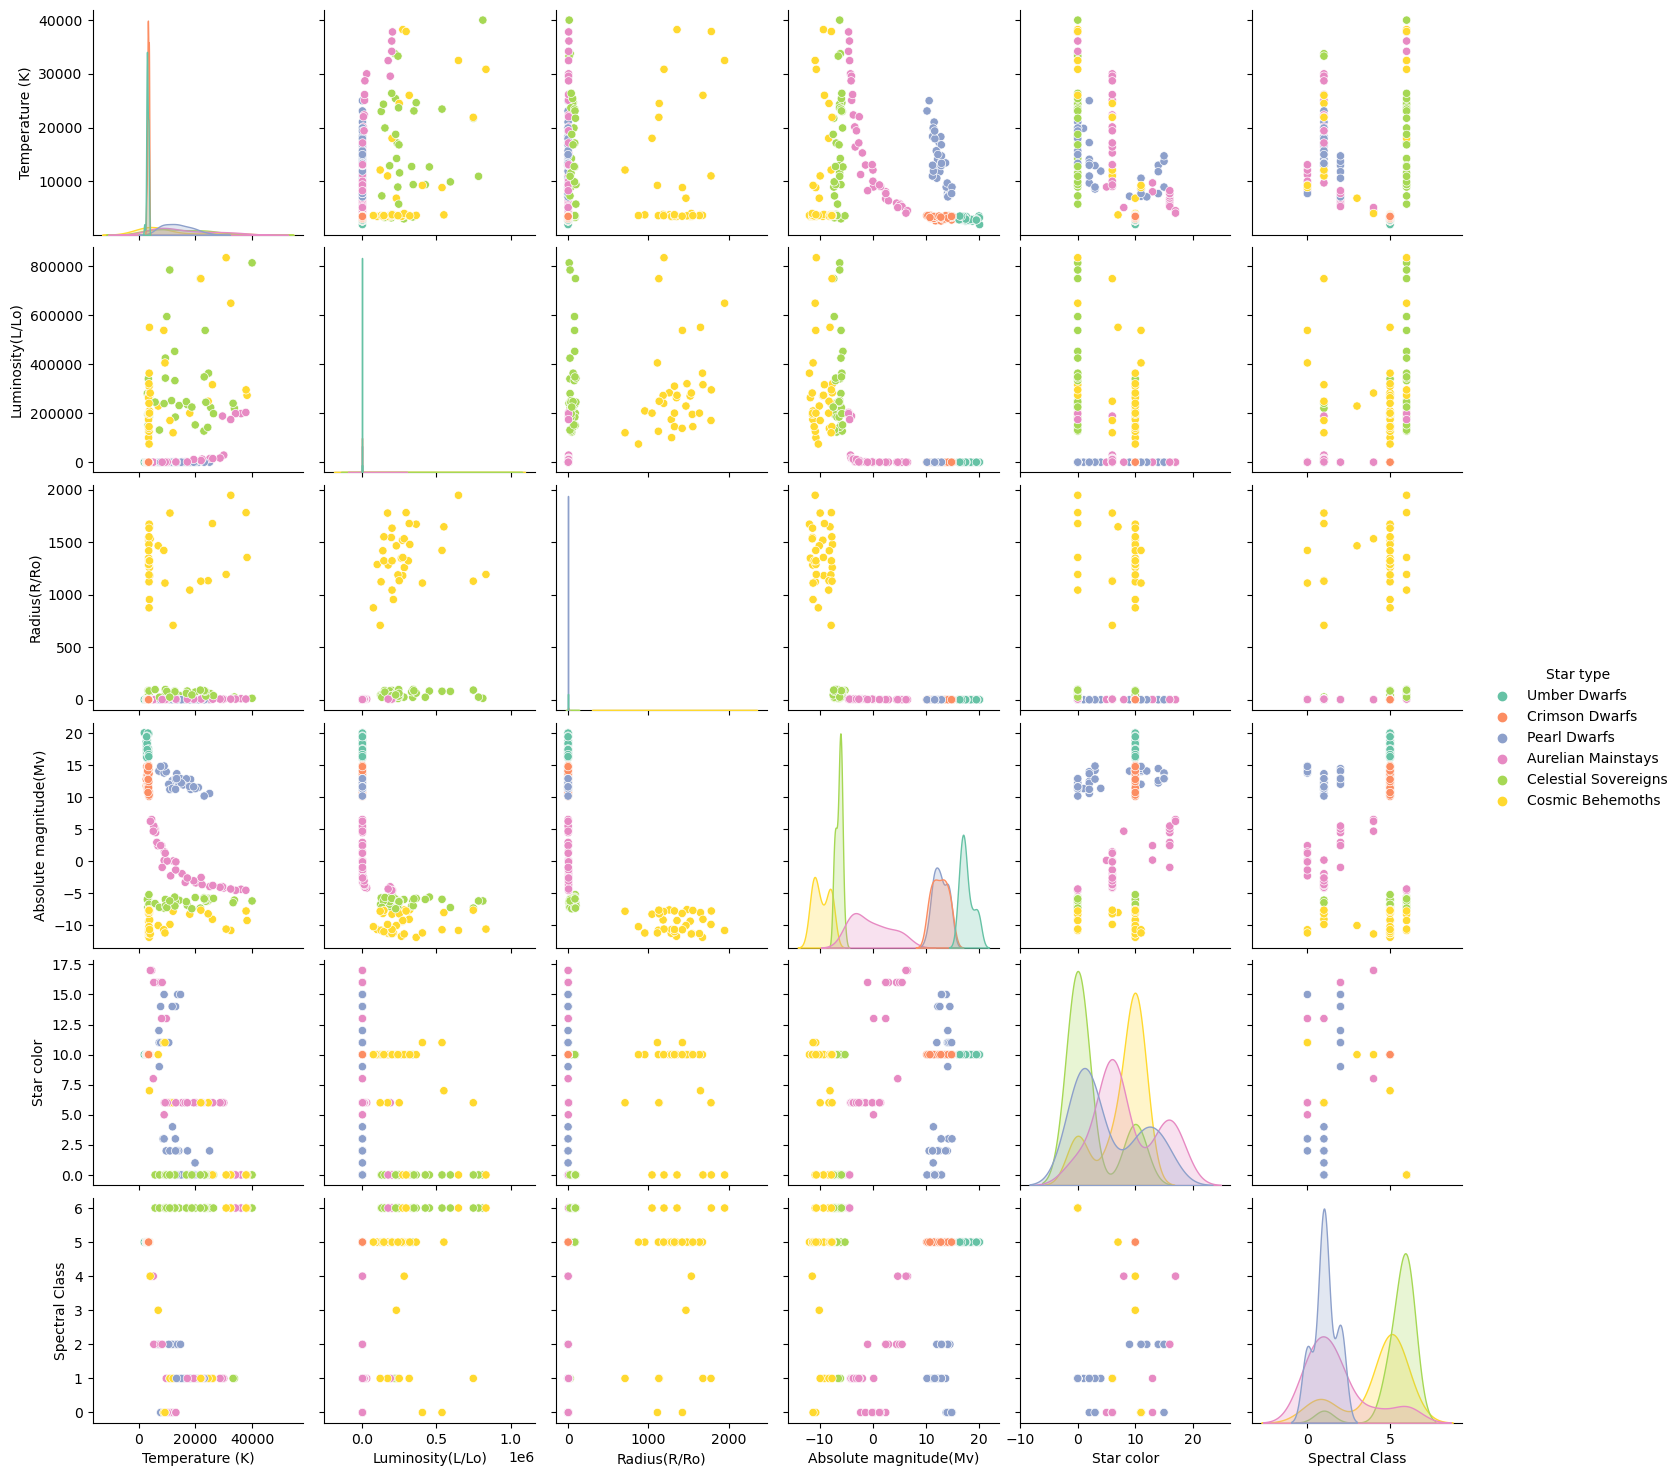

In [12]:
## Ploting the pairplot using seaborn
sns.pairplot(train, hue="Star type", palette="Set2")
plt.show()

###  By Intuition we can say out data is skewed
###  By observing the Temperature and and other histograms

In [13]:
## import skew to check skewness of the DataFrame
from scipy.stats import skew

In [14]:
## printing the skewness in each columns
## The allowed value of skewness is ranges from -1 to +1
print(train.iloc[:,0:6].apply(lambda x: skew(x)))

Temperature (K)           1.335133
Luminosity(L/Lo)          2.115311
Radius(R/Ro)              2.051648
Absolute magnitude(Mv)   -0.143580
Star color               -0.359651
Spectral Class           -0.634135
dtype: float64


In [15]:
## This Code Snippet correct the skewness of the column using log transformation
## By this loop we check every column if the value of skewness is out of thee condition then log transformation will be performed
for column in train.iloc[:, :-1].columns:
    skewness = skew(train[column])
    if skewness > 1 or skewness < -1:
        train[column] = np.log(train[column])

In [16]:
## printing the skewness in each columns
print(train.iloc[:,0:6].apply(lambda x: skew(x)))

Temperature (K)           0.451682
Luminosity(L/Lo)          0.213286
Radius(R/Ro)              0.368471
Absolute magnitude(Mv)   -0.143580
Star color               -0.359651
Spectral Class           -0.634135
dtype: float64


<Figure size 1200x600 with 0 Axes>

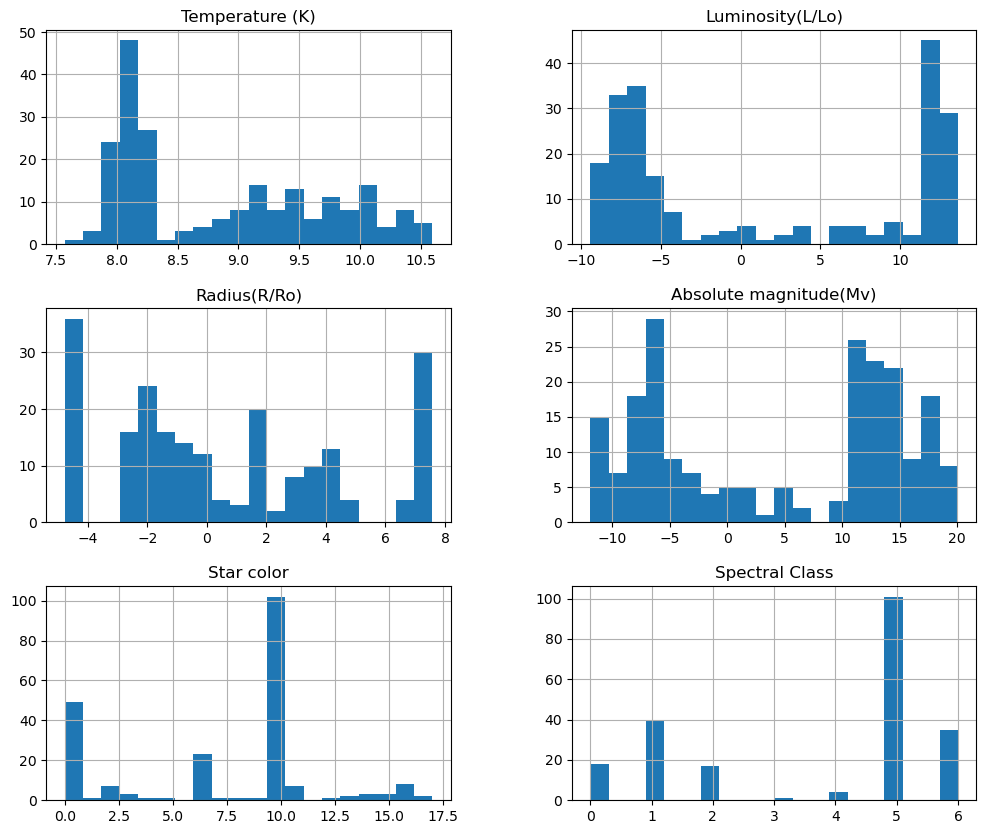

In [17]:
## Ploting histograms of each column
plt.figure(figsize=(12,6))
train.hist(bins=20, figsize=(12,10))
plt.show()

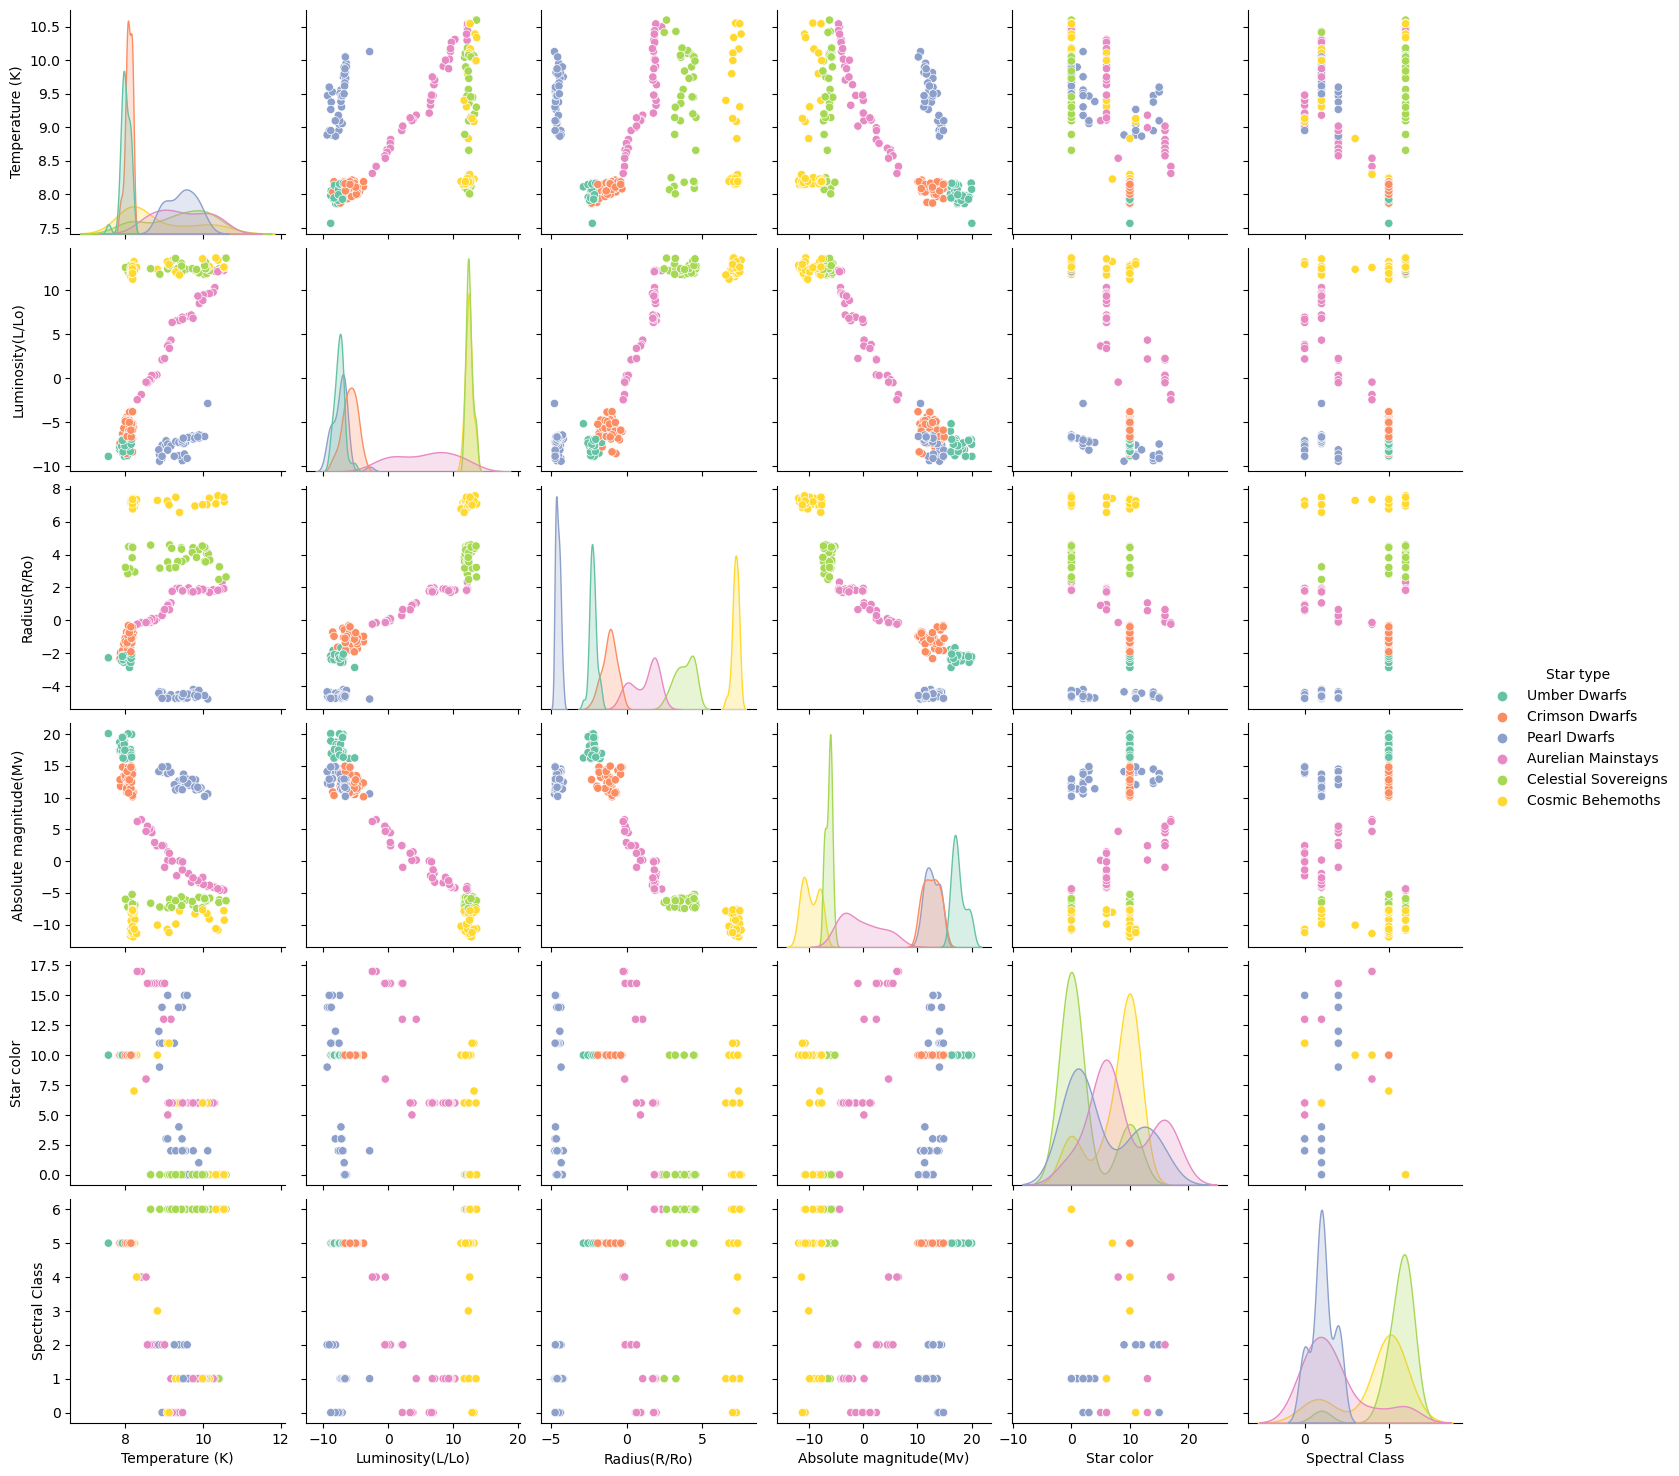

In [18]:
## Ploting the pairplot using seaborn
sns.pairplot(train, hue="Star type", palette="Set2")
plt.show()

In [19]:
## importing StandarScalar to rescale the DataFrame
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [20]:
## Standardize the values and store them into a array
train_data = scaler.fit_transform(train.iloc[:,0:6])
## convert the array to DataFrame again
train_data = pd.DataFrame(train_data, columns=train.iloc[:,0:6].columns)
## Printing the first 5 rows
train_data.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star color,Spectral Class
0,-0.994561,-0.828540,-0.621636,1.109046,0.559391,0.602525
1,-1.004690,-1.001509,-0.646719,1.154972,0.559391,0.602525
2,-1.191543,-1.057837,-0.752989,1.355897,0.559391,0.602525
3,-1.103346,-1.102547,-0.637225,1.159755,0.559391,0.602525
4,-1.540652,-1.143464,-0.750480,1.486020,0.559391,0.602525


In [21]:
##printing shape of training data set
train_data.shape

(216, 6)

# Test Data Preprocessing

In [22]:
## All the Preprocessing steps are same as for the Train Data Preprocessing

In [23]:
test = pd.read_csv('test.csv')
test.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star color,Spectral Class
0,16500,0.01300,0.014,11.89,Blue White,B
1,2637,0.00073,0.127,17.22,Red,M
2,4980,0.35700,1.130,4.78,Yellowish,K
3,33421,352000.00000,67.000,-5.79,Blue,O
4,11096,112000.00000,12.000,-5.91,Blue,O


In [24]:
test['Spectral Class'] = LE.fit_transform(test['Spectral Class'])
test['Star color'] = LE.fit_transform(test['Star color'])
test.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star color,Spectral Class
0,16500,0.01300,0.014,11.89,1,1
1,2637,0.00073,0.127,17.22,4,3
2,4980,0.35700,1.130,4.78,5,2
3,33421,352000.00000,67.000,-5.79,0,4
4,11096,112000.00000,12.000,-5.91,0,4


<Figure size 1200x600 with 0 Axes>

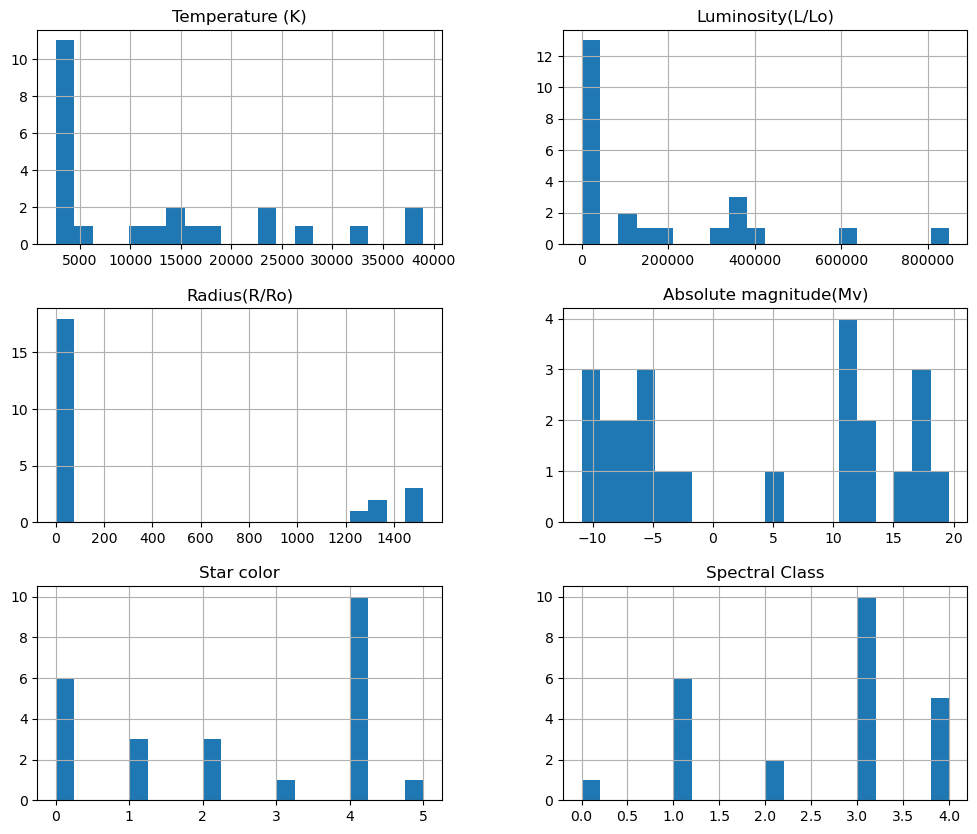

In [25]:
plt.figure(figsize=(12,6))
test.hist(bins=20, figsize=(12,10))
plt.show()

In [26]:
print(test.iloc[:,0:5].apply(lambda x: skew(x)))

Temperature (K)           0.952168
Luminosity(L/Lo)          1.512765
Radius(R/Ro)              1.176691
Absolute magnitude(Mv)    0.088895
Star color               -0.210105
dtype: float64


In [27]:
for column in test.iloc[:, :-1].columns:
    skewness = skew(test[column])
    if skewness > 1 or skewness < -1:
        test[column] = np.log(test[column])

In [28]:
print(test.iloc[:,0:5].apply(lambda x: skew(x)))

Temperature (K)           0.952168
Luminosity(L/Lo)         -0.034189
Radius(R/Ro)              0.189323
Absolute magnitude(Mv)    0.088895
Star color               -0.210105
dtype: float64


<Figure size 1200x600 with 0 Axes>

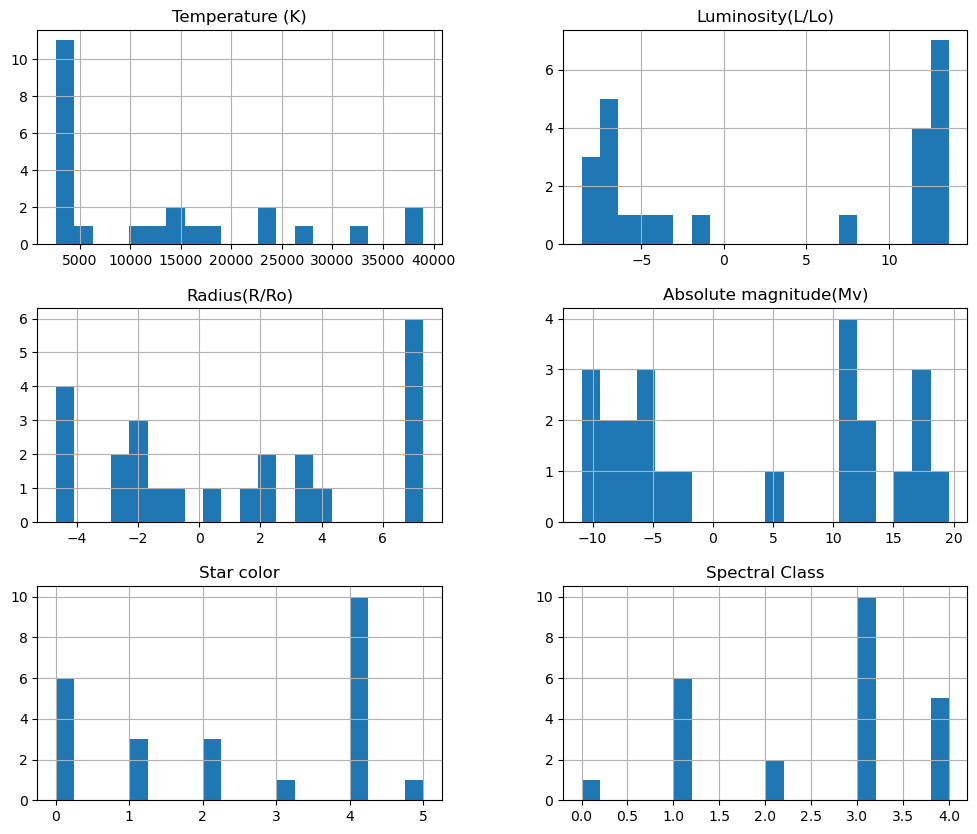

In [29]:
plt.figure(figsize=(12,6))
test.hist(bins=20, figsize=(12,10))
plt.show()

In [30]:
test_data = scaler.fit_transform(test)
test_data = pd.DataFrame(test_data, columns=test.columns)
test_data.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star color,Spectral Class
0,0.288774,-0.779312,-1.284629,0.806648,-0.785047,-1.260252
1,-0.880108,-1.087116,-0.770435,1.293904,0.927783,0.420084
2,-0.682554,-0.425211,-0.260751,0.156667,1.498726,-0.420084
3,1.715497,1.050008,0.691204,-0.809619,-1.355990,1.260252
4,-0.166873,0.927605,0.290183,-0.820589,-1.355990,1.260252


In [31]:
test_data.shape

(24, 6)

# DataFrame Break

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [33]:
X = train_data
y=train['Star type']

In [34]:
print(X.shape, y.shape)

(216, 6) (216,)


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
print('X_train:',X_train.shape)
print('y_train:', y_train.shape)
print('X_test:',X_test.shape)
print('y_test:',y_test.shape)

X_train: (172, 6)
y_train: (172,)
X_test: (44, 6)
y_test: (44,)


# Model Training

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [38]:
param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Random Forest classifier object
rfc = RandomForestClassifier()

# Perform Grid Search to find the best hyperparameters
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

print("Best Hyperparameters: ", best_params)

print("Accuracy:", grid_search.best_score_)


Best Hyperparameters:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 1.0


In [39]:
## Testing The Model
rfc_best = RandomForestClassifier(max_depth=None, min_samples_leaf= 1,min_samples_split=2,n_estimators=100)
rfc_best.fit(X_train, y_train)

RandomForestClassifier()

In [40]:
## predicting on X-test 
pred = rfc_best.predict(X_test)

In [41]:
# Calculate the accuracy score
accuracy = accuracy_score(y_test, pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


# Final Prediction

In [42]:
## Predicting on the test_data
final = rfc_best.predict(test_data)

In [43]:
## creating a DataFrame by passing the output of final prediction
result = pd.DataFrame(final.flatten())

In [44]:
## adds new column result to the test_data named Star type
test_data['Star type'] = result

In [45]:
## droping the columns and creating a new DataFrame
submission = test_data.drop(['Temperature (K)','Luminosity(L/Lo)','Radius(R/Ro)','Absolute magnitude(Mv)','Star color','Spectral Class'], axis = 1)

In [46]:
# Modify the index to start from 1
submission.reset_index(drop=True, inplace=True)
submission.index += 1

In [47]:
## saving into new file 
sumission = submission.to_csv('NebulaNet_submission.csv', index_label = 'ID')

In [48]:
## loading the saved output 
NebulaNet_submission = pd.read_csv('NebulaNet_submission.csv')
NebulaNet_submission

,ID,Star type
0,1,Pearl Dwarfs
1,2,Umber Dwarfs
2,3,Aurelian Mainstays
3,4,Celestial Sovereigns
4,5,Aurelian Mainstays
5,6,Cosmic Behemoths
6,7,Cosmic Behemoths
7,8,Pearl Dwarfs
8,9,Umber Dwarfs
9,10,Pearl Dwarfs


#                             Thank You